In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random
import scipy.stats as sts

#import citipy
import urllib.parse
import requests
import json

In [2]:
url_api = 'https://services.arcgis.com/S9th0jAJ7bqgIRjw/arcgis/rest/services/Alcohol_Related/FeatureServer/0/query?where=1%3D1&outFields=YEAR,DATE,District,WardNum,Division,LATITUDE,LONGITUDE,LIGHT,ACCLASS,INJURY,VEHTYPE,DRIVCOND,Neighbourhood,ObjectId&outSR=4326&f=json'
tor_pd = requests.get(url_api)
from pprint import pprint
#pprint (tor_pd.text)

In [3]:
tpd_data = tor_pd.json()
#pprint(tpd_data)

In [4]:
tpd_data['features']
tpd_data_ft = tpd_data['features']
#tpd_data_ft
#tor_pd_df = pd.DataFrame(pd.json_normalize(tor_pd.json()))
#tor_pd_df = pd.json_normalize

In [5]:
for k, v, in tpd_data_ft[0].items():
    print(k)
    
#for key and value in... 

attributes
geometry


In [6]:
#with open ('tor_pd_alcohol.csv', 'w') as outfile:
#    json.dump(tpd_data_ft, outfile)

In [7]:
tor_pd_df = pd.json_normalize(data=tpd_data_ft, record_prefix=None)

In [8]:
tor_pd_df.columns = tor_pd_df.columns.str.strip('attributes.')

In [9]:
tor_pd_df

,YEAR,DATE,Distric,WardNum,Division,LATITUDE,LONGITUDE,LIGHT,ACCLASS,INJURY,VEHTYPE,DRIVCOND,Neighbourhood,ObjectId,geometry.x,geometry.y
0,2006,1136091600000,Toronto and East York,19.0,54,43.699595,-79.318797,Dark,Non-Fatal Injury,Major,None,None,Woodbine-Lumsden (60),1,-79.318797,43.699595
1,2006,1136091600000,Toronto and East York,19.0,54,43.699595,-79.318797,Dark,Non-Fatal Injury,Minor,None,None,Woodbine-Lumsden (60),2,-79.318797,43.699595
2,2006,1136091600000,Toronto and East York,19.0,54,43.699595,-79.318797,Dark,Non-Fatal Injury,Minor,"Automobile, Station Wagon",Normal,Woodbine-Lumsden (60),3,-79.318797,43.699595
3,2006,1136091600000,Toronto and East York,19.0,54,43.699595,-79.318797,Dark,Non-Fatal Injury,Minor,None,None,Woodbine-Lumsden (60),4,-79.318797,43.699595
4,2006,1136091600000,Toronto and East York,19.0,54,43.699595,-79.318797,Dark,Non-Fatal Injury,Minor,None,None,Woodbine-Lumsden (60),5,-79.318797,43.699595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
708,2019,1564113600000,North York,NaN,41,43.757865,-79.315212,"Dark, artificial",Non-Fatal Injury,Major,"Automobile, Station Wagon",Normal,Wexford/Maryvale (119),709,-79.315212,43.757865
709,2019,1564113600000,North York,NaN,41,43.757865,-79.315212,"Dark, artificial",Non-Fatal Injury,Minimal,None,None,Wexford/Maryvale (119),710,-79.315212,43.757865
710,2019,1564113600000,North York,NaN,41,43.757865,-79.315212,"Dark, artificial",Non-Fatal Injury,Minimal,None,None,Wexford/Maryvale (119),711,-79.315212,43.757865
711,2019,1564113600000,North York,NaN,41,43.757865,-79.315212,"Dark, artificial",Non-Fatal Injury,Minimal,None,None,Wexford/Maryvale (119),712,-79.315212,43.757865


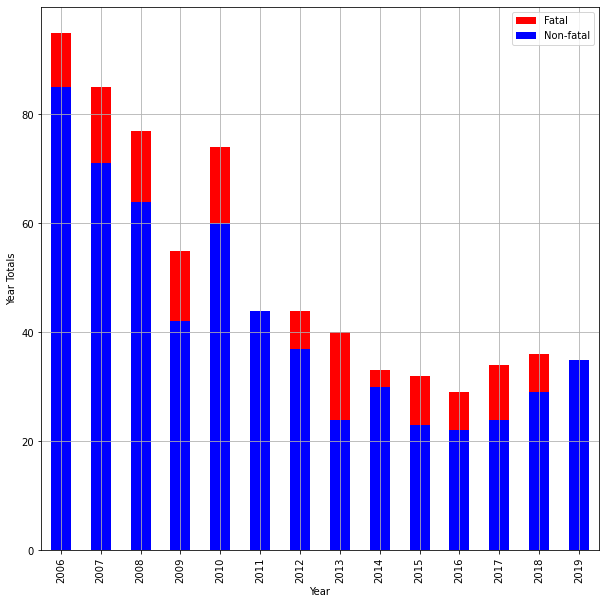

In [10]:
#year totals

year_total_crime = tor_pd_df.groupby(['YEAR']).count()['DATE']

year_total_nonfatal_df = tor_pd_df.loc[lambda tor_pd_df : tor_pd_df['ACCLASS']=='Non-Fatal Injury']
year_total_nonfatal = year_total_nonfatal_df.groupby(['YEAR']).count()['DATE']

plt.figure(figsize =(10,10))

ax1 = year_total_crime.plot.bar(color='red')
ax2 =  year_total_nonfatal.plot.bar(color='blue', grid =True)


h1, l1 = ax1.get_legend_handles_labels()
l1 = ['Fatal', "Non-fatal"]
plt.legend(h1, l1, loc=1)
plt.grid()
plt.xlabel('Year')
plt.ylabel('Year Totals')
plt.grid()
plt.show()


In [11]:
year_crime = tor_pd_df['YEAR'].unique()

#to count how many unique neighboorhoods there are

print (len(tor_pd_df['Neighbourhood'].unique()), "neighbourhoods")

#group crimes by neighboorhood and year
neighbourhood_totals = tor_pd_df.groupby(['Neighbourhood']).count()['DATE']


neighbourhood_totals

87 neighbourhoods


Neighbourhood
Agincourt North (129)            6
Alderwood (20)                   9
Annex (95)                       9
Banbury-Don Mills (42)          21
Bathurst Manor (34)              7
                                ..
Woburn (137)                    32
Woodbine-Lumsden (60)            8
Yonge-Eglinton (100)             4
York University Heights (27)     9
Yorkdale-Glen Park (31)          4
Name: DATE, Length: 87, dtype: int64

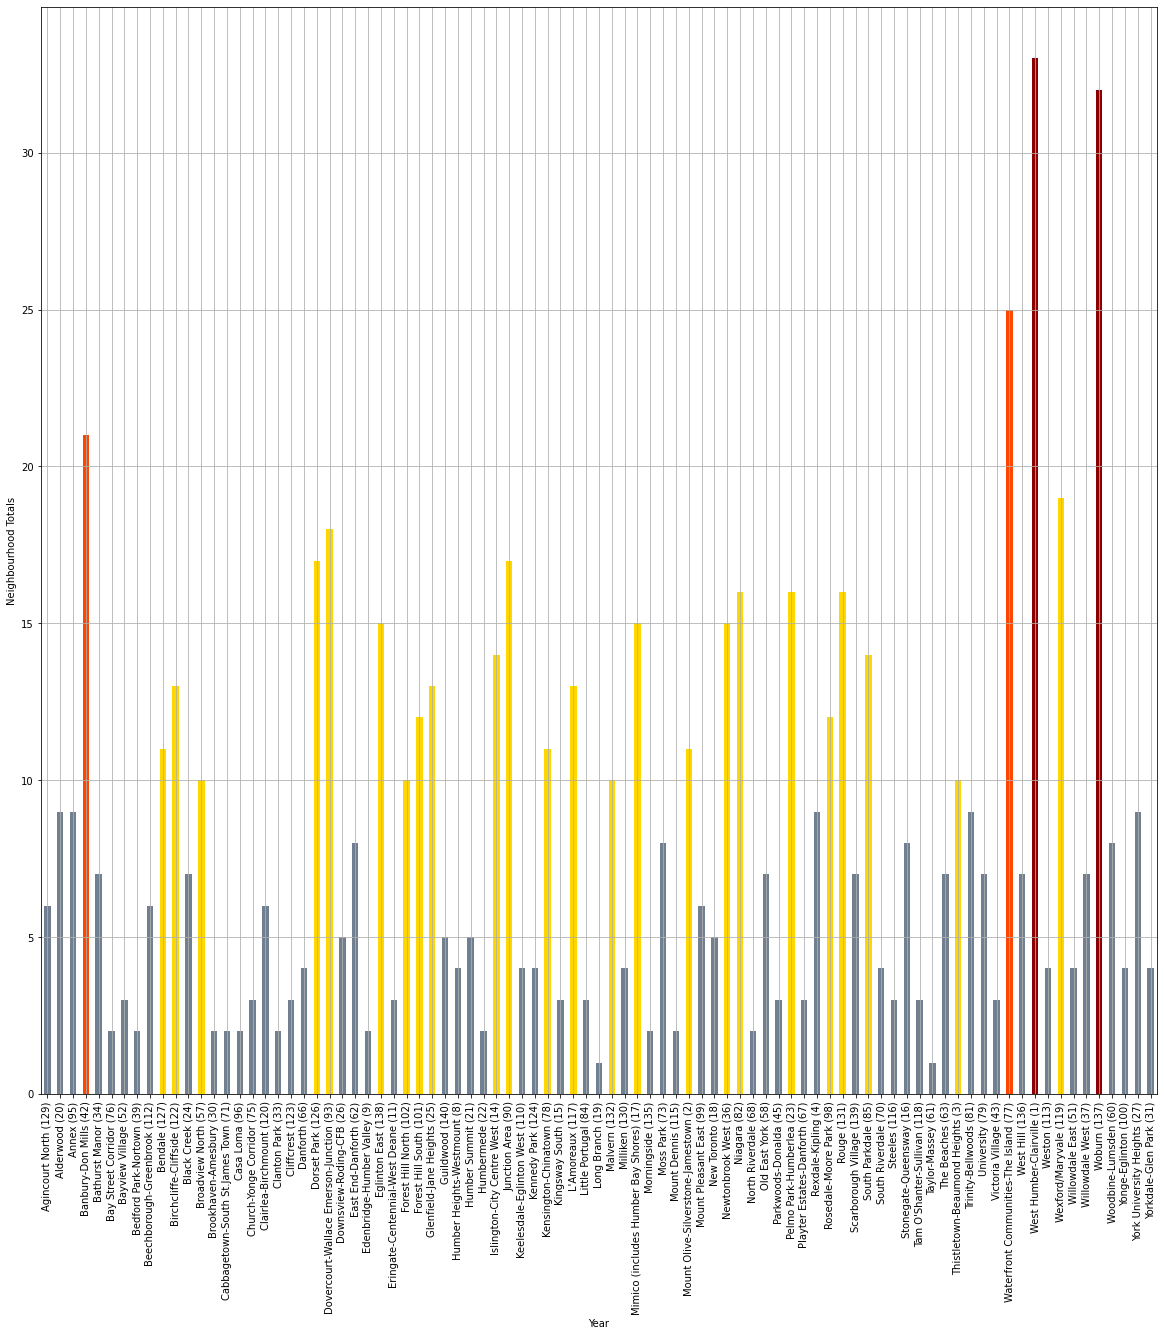

In [12]:
colors = []

for index, value in neighbourhood_totals.items():
    #print (f'Index : {index}, Value: {value}')
    if value >=30:
        colors.append('darkred')
    elif value >=20:
        colors.append('orangered')
    elif value >=10:
        colors.append('gold')
    else:
        colors.append('slategrey')
    
    
plt.figure(figsize =(20,20))
neighbourhood_totals.plot.bar(color=colors)
plt.xlabel('Year')
plt.ylabel('Neighbourhood Totals')
plt.grid()
plt.show()


In [13]:
neighboorhoods = tor_pd_df['Neighbourhood'].unique()
#neighboorhoods

In [15]:
#neighbourhood median incomes
neighbourhood_income = pd.read_csv('Resources\tor_hh_income_2016_cmhc.csv')
neighbourhood_income.head(10)

OSError: [Errno 22] Invalid argument: 'Resources\tor_hh_income_2016_cmhc.csv'

In [14]:
# #west_humber = tor_pd_df.loc[tor_pd_df['Neighbourhood' == 'West Humber-Clairville (1)']]
# west_humber = tor_pd_df.loc[lambda tor_pd_df: tor_pd_df['Neighbourhood']=='West Humber-Clairville (1)']
# #west_humber.head(35)

# west_fatal_df = west_humber.loc[lambda west_humber : west_humber['ACCLASS']!='Non-Fatal Injury']
# #west_fatal_df
# west_fatal_total = west_fatal_df.groupby(['YEAR']).count()['DATE']
# #west_fatal_total

# west_non_fatal_df = west_humber.loc[lambda west_humber : west_humber['ACCLASS']=='Non-Fatal Injury']
# west_non_fatal = west_non_fatal_df.groupby(['YEAR']).count()['DATE']
# west_non_fatal

#create an full series by appending empty years for visual effect, for both fatal and non-fatal

In [15]:
gdp_data = pd.read_csv('Resources\Canada_GDP_1960-2018.csv')

In [16]:
gdp_data.head()

,Date,Canada Annual GDP (M),GDP Growth (%),GDP per capita,GDP P.C. Annual Growth,Unnamed: 5
0,2018,1712479,2.00%,2018,46290,2.40%
1,2017,1649934,3.20%,2017,45217,6.50%
2,2016,1530024,1.00%,2016,42440,-2.70%
3,2015,1556506,0.70%,2015,43626,-14.50%
4,2014,1805745,2.90%,2014,51021,-3.20%


In [21]:
gdp_selection = gdp_data.loc[lambda gdp_data : gdp_data ['Date']>=2006]

In [39]:
gdp_year = gdp_selection['Date']
gdp_annual = gdp_selection['Canada Annual GDP (M)']
